In [2]:
import geopandas as gp

In [3]:
# here we use the python package geopandas to open "shapefiles" of each basin we are studying
# https://geopandas.org/en/stable/

# shapefiles are a geographic information system vector file format 
# links to source of each shapefile are provided inline

br = gp.read_file('../data/smap__part1__archived/bear_river/bearrivshp/brfromhuc12.shp') ## https://bearriverinfo.org/files-ou/dataset-downloads/brfromhuc12.zip
co = gp.read_file('../data/smap__part1__archived/colorado/shapefile/CRBasin_PacificInstitute.shp') ## source https://www.arcgis.com/home/item.html?id=d1706d2cbf824c0eba9ef90d2a2551b1
ct = gp.read_file('../data/smap__part1__archived/connecticut/ct_shp/wbd_ctriver.shp') # https://www.sciencebase.gov/catalog/item/533340c2e4b0615fe7d2b6ee
ms = gp.read_file('../data/smap__part1__archived/mississippi/shapefile/Miss_RiverBasin.shp') # https://www.sciencebase.gov/catalog/item/55de04d5e4b0518e354dfcf8

In [4]:
# calling the variable br (short for bear river) shows pertinent information about the shapefile
# area information is provided, but it would be better if it was in acreage. 
br

,ID,AREA,PERIMETER,NAME,AREA_KM2,AREA_MI2,geometry
0,1,1.942648e+10,1.154298e+06,Bear River Watershed,19426.4812,7500.6063,"POLYGON ((516825.377 4656382.410, 516827.238 4..."


In [5]:
# here's a simple function that converts square miles into acres

def square_miles_to_acres(x):
    return x*640

In [6]:
# now we take the simple function and use it to convert area in square miles to acres

x = square_miles_to_acres(br.AREA_MI2) #calling br's AREA_KM2 column.
print(f"bear river's acreage \n{round(x[0],2)}")

bear river's acreage 
4800388.03


In [7]:
# looking at the colorado basin shapefile, it is a bit more of a complex file. there are
# several shapes within the one shapefile. 

co

,Part,Shape_Leng,Shape_Area,Area_mi2,geometry
0,Lower Basin,50.662839,36.089429,143427.00,"POLYGON ((-109.87814 31.32732, -109.96628 31.3..."
1,Upper Basin,35.856205,29.487600,109632.00,"POLYGON ((-109.81981 43.37415, -109.81105 43.3..."
2,Delta,6.838396,1.258540,5205.81,"POLYGON ((-114.73121 32.68664, -114.73948 32.6..."
3,Headwaters,3.655091,0.260859,1070.57,"POLYGON ((-109.87814 31.32732, -109.87733 31.3..."


In [8]:
# for our purposes, let's sum the areas in square miles, and then convert to acres.
x = sum(co.Area_mi2)
y = square_miles_to_acres(x)
print(f"colorado river's acreage \n{y}")

colorado river's acreage 
165974643.2


In [9]:
# at this point, i should probably note that i am continuously cycling through x and y variables.
# no long term storage...  just using the variables temporarily to print out what i need.

In [10]:
ct

,OBJECTID,Gaz_ID,Area_Acres,Area_SqKm,States,LoadDate,HUC_4,HU_4_Name,Shape_Leng,Shape_Area,Hectares,geometry
0,3,0,0.0,0.0,None,None,0108,Connecticut,18.277795,3.226457,2.910335e+06,"POLYGON ((1915810.520 2729742.912, 1915782.237..."


In [11]:
def hectares_to_acres(x):
    return x*2.47105

In [12]:
x = hectares_to_acres(ct.Hectares[0])
print(f"connecticut river's acreage: \n{x}")

connecticut river's acreage: 
7191583.334713807


In [13]:
ms

,MRB,area_mi2,Shape_Leng,Shape_Area,geometry
0,1,1.269499e+06,1.831555e+07,3.287987e+12,"POLYGON ((-1030314.401 3039232.393, -1030299.8..."


In [14]:
import time

In [15]:
x = square_miles_to_acres(ms.area_mi2)
print(x)
time.sleep(2)
# just want the number... 
# geopandas wants you to call the row number, which is the result number
# remember back to the colorado basin with multiple shapes in one shapefile.

# first let's give this some space
print('\n\n*\t\t*\t\t*\n\t*\n\n\t\tSPACE\t*\t\t*\n\t*\n\t\t\t\t*\n*\t\t\t*\n\n')

time.sleep(2)
# f-string
print(f"mississippi river basin's acreage: {x[0]}")
# see, the number is on the same line when you call [0]

0    8.124793e+08
Name: area_mi2, dtype: float64


*		*		*
	*

		SPACE	*		*
	*
				*
*			*


mississippi river basin's acreage: 812479349.4592


In [ ]:
## below one stops and looks at the projected coordinate systems of the shapefiles.
# different agencies present their boundary data in sometimes unique ways.
# adherence to a particular standard seems to be challenging.
# the data as we saw previously is not uniform and might be called messy.

In [16]:
br.crs

# properly states EPSG:26912 which works as predicted in figure plotting script.
# this is the best documented coordinate reference system of the four shown.

<Derived Projected CRS: EPSG:26912>
Name: NAD83 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 114°W and 108°W - onshore and offshore. Canada - Alberta; Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Arizona; Colorado; Idaho; Montana; New Mexico; Utah; Wyoming.
- bounds: (-114.0, 31.33, -108.0, 84.0)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
co.crs

# calls EPSG:4326 which is unprojected coordinate system (matrix of rows and columns equally spaced)
# it is not necessarily equal to plate carree but acceptable for the purpose of approximating boundaries for figure 1.
# at high latitudes, there are definitely distortions to looking @ EPSG:4326 / plate carree type approach.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
ct.crs

# does not call out EPSG, but stated as albers and nad 1983 (north american datum, focus on north america)
# and location is in United States so EPSG:5070 fits

<Derived Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
ms.crs

# calls outs ESRI number, which is corporation behind ArcGIS and ArcGIS Pro software.
# like connecticut, albers and NAD1983 are stated, so 5070 fits

<Derived Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
br.geometry

0    POLYGON ((516825.377 4656382.410, 516827.238 4...
Name: geometry, dtype: geometry

findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.
findfont: Font family '/System/Library/Fonts/Supplemental/Wingdings 3.ttf' not found.


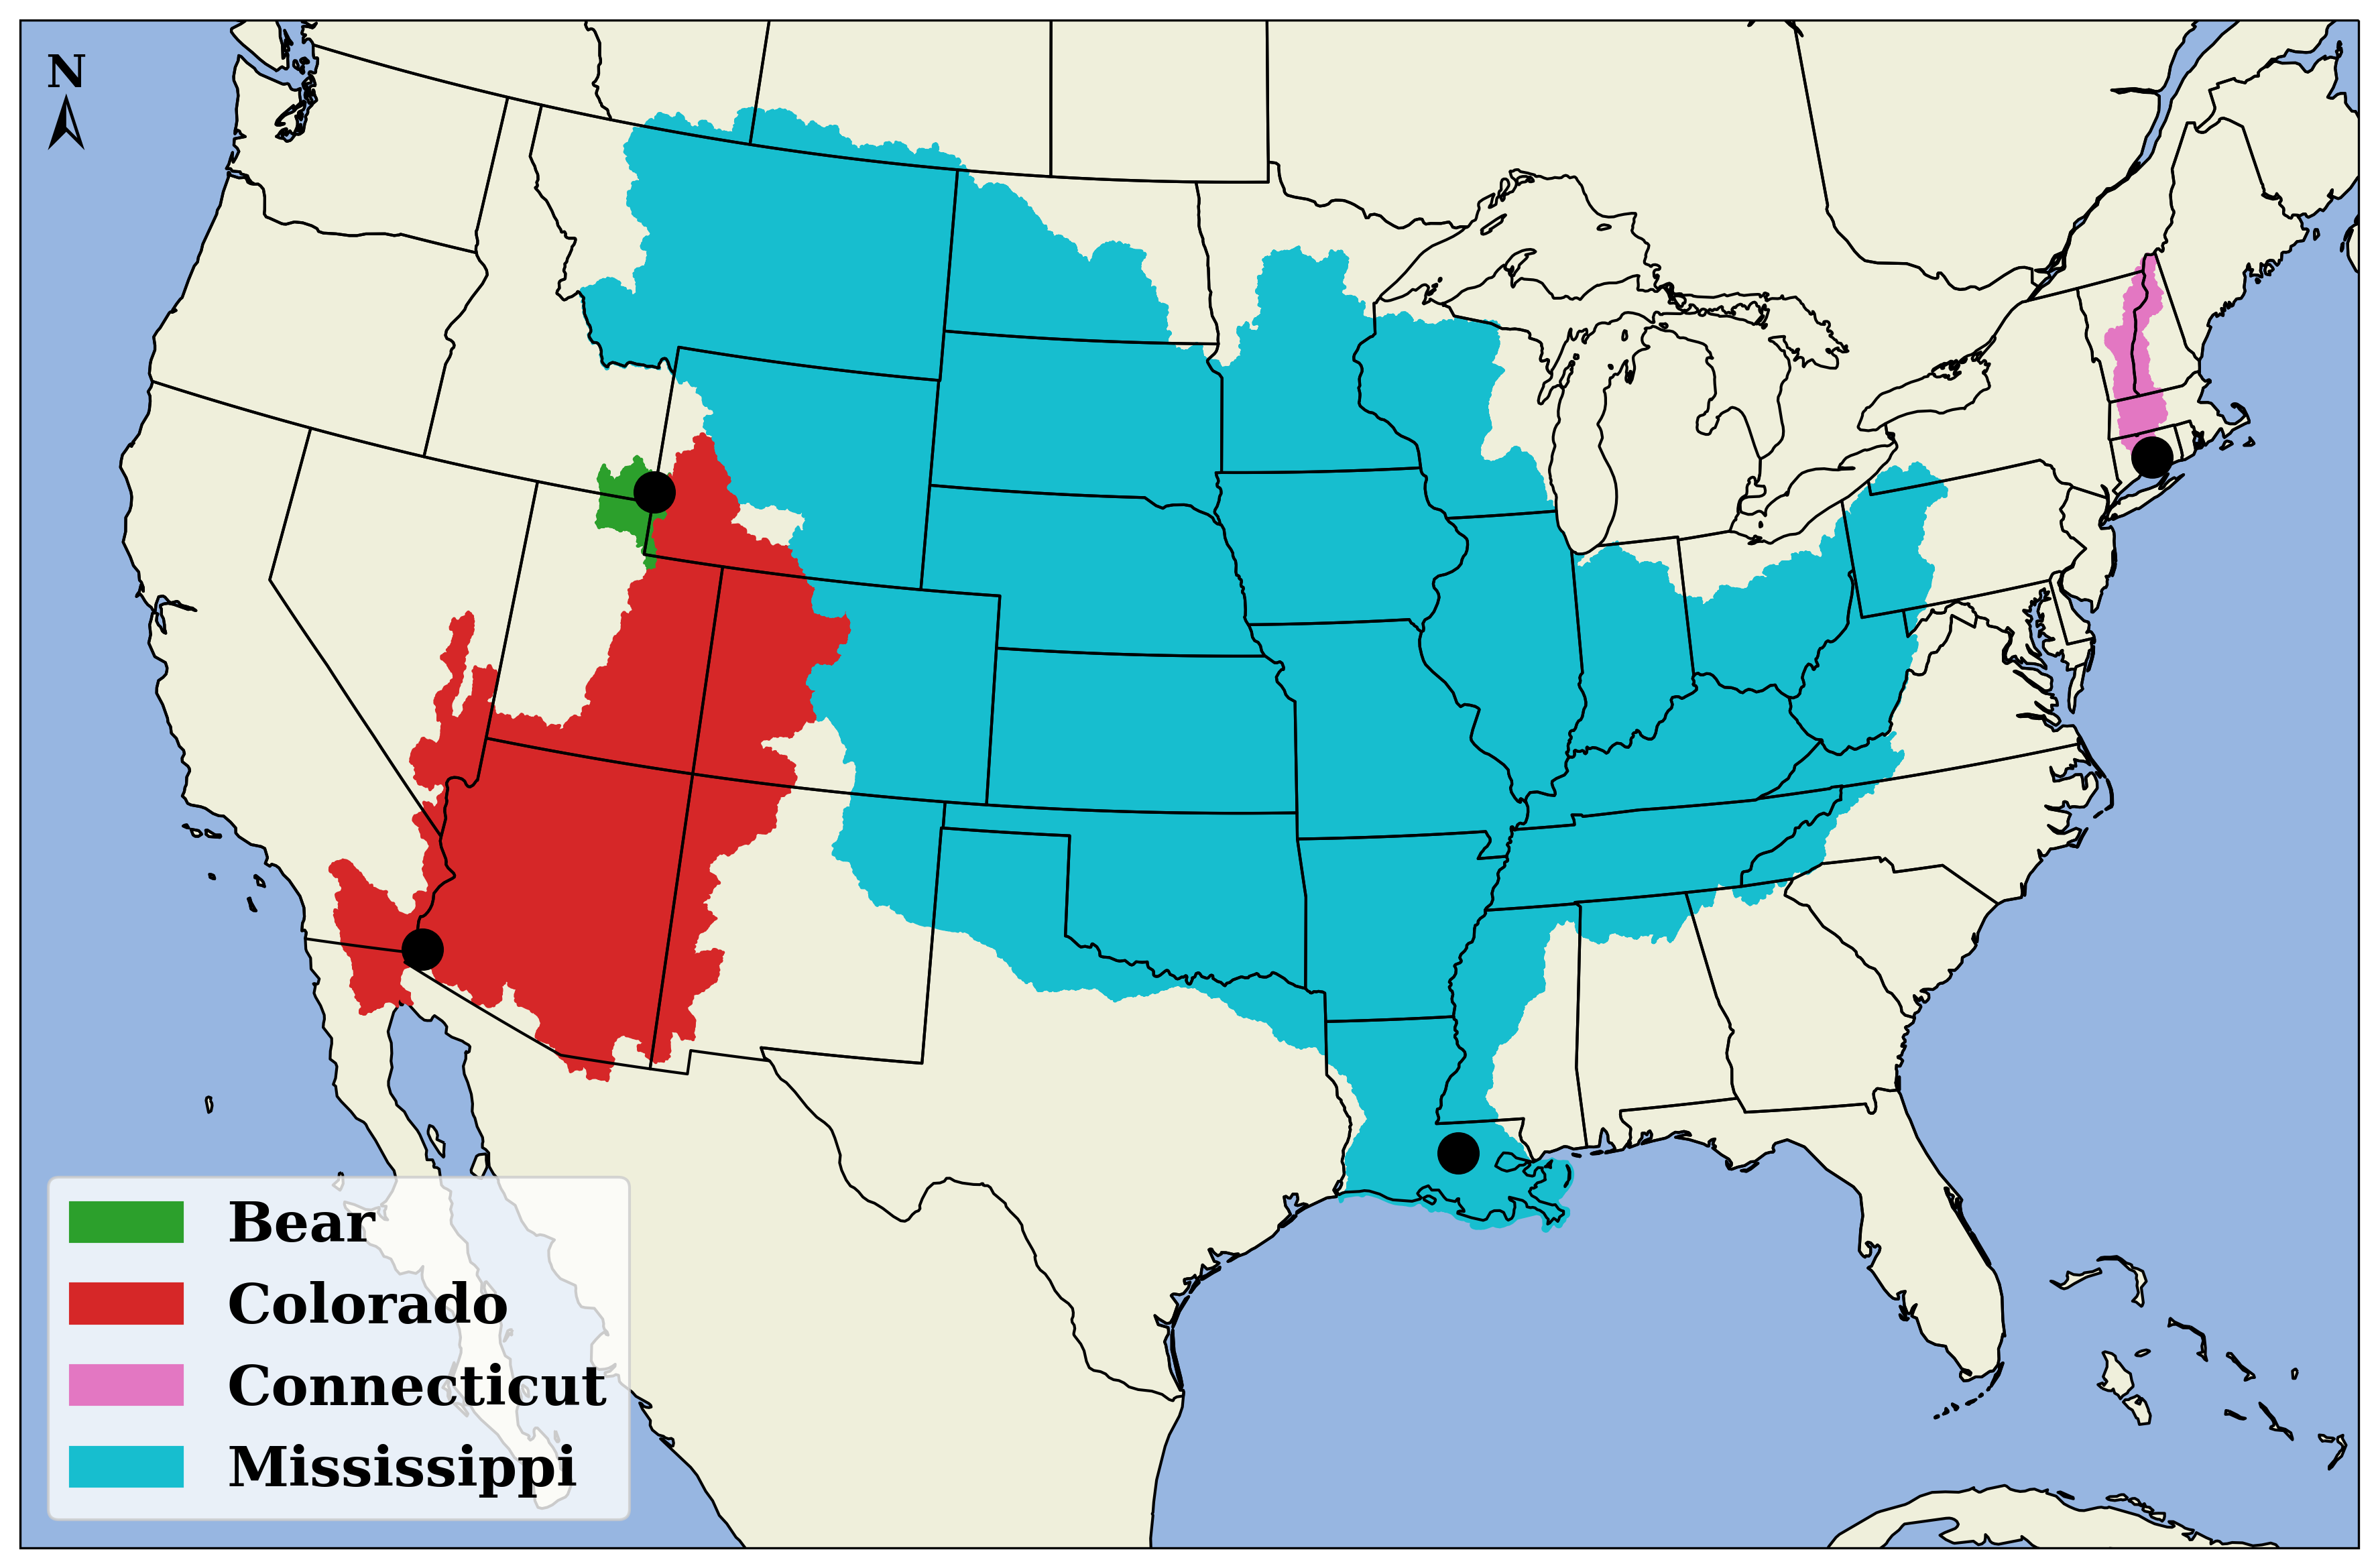

time elapsed:	1.998


In [186]:
# timing the script

import time
t0 = time.time() # marks start

# matplotlib pyplot plotting interface, supposed to synthesize MATLAB plots
import matplotlib.pyplot as plt

# for creating the legend
import matplotlib.patches as mpatches

#cartopy coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['figure.dpi'] = 300


points_ms = [-91.206944, 30.429167]
points_ct = [-72.5531454, 41.5417656]
points_co = [-114.5149494, 32.8122666]
points_br = [-111.0538022,42.21104338]
points = [points_ct,points_ms,points_co,points_br]

fig = plt.figure(figsize=(15,15)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([-120, -74, 21, 50])
ax.coastlines() #adds coastlines
ax.add_feature(cfeature.STATES,zorder=2) #states
ax.add_feature(cfeature.LAND) #land
ax.add_feature(cfeature.OCEAN) #ocean
ax.add_geometries(br.geometry,crs=ccrs.epsg(26912),color='#2ca02c') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries(co.geometry,crs=ccrs.PlateCarree(),color='#d62728')# "" colorado """ "" "" """ "" """"" "" """"" "" """"" "" """"" "" (Plate Carree)""""" "" """"" "" ""
ax.add_geometries(ct.geometry,crs=ccrs.epsg(5070),color='#e377c2')# "" connecticut """"" "" """"" "" """"" "" """"" "" """"" "" """"" ""  5070 "" "" ""
ax.add_geometries(ms.geometry,crs=ccrs.epsg(5070),color='#17becf')# "" mississippi""" "" """"" "" """"" "" """"" "" """"" "" """"" "" """"" "" 5070 """"" "" ""
ax.scatter([i[0] for i in points],[i[1] for i in points],marker='o',s=200,c='black',transform=ccrs.PlateCarree(),zorder=50)
colorado = mpatches.Patch(color='#d62728', label='Colorado') #creates legend item, specifies color
bearriver = mpatches.Patch(color='#2ca02c', label='Bear')#creates legend item, specifies color
connecticut = mpatches.Patch(color='#e377c2', label='Connecticut')#creates legend item, specifies color
mississippi = mpatches.Patch(color='#17becf', label='Mississippi')#creates legend item, specifies color
ax.legend(handles=[bearriver,colorado,connecticut,mississippi],loc='lower left',fontsize=20) # creates legend


na_x = 0
na_y = 0.915

plt.rcParams["font.family"] = "/System/Library/Fonts/Supplemental/Wingdings 3.ttf"
ax.annotate('➣', xy=(na_x,na_y), xycoords='axes fraction', ha='left', va='bottom',size=30,rotation=90)
# ax.annotate('➣', xy=(.717, 0.065), xycoords='axes fraction', ha='left', va='bottom',size=50,rotation=0)
# ax.annotate('➣', xy=(.6445, 0.074), xycoords='axes fraction', ha='left', va='bottom',size=50,rotation=180)
# ax.annotate('➣', xy=(.673, 0.02), xycoords='axes fraction', ha='left', va='bottom',size=50,rotation=270)
plt.rcParams["font.family"] = "DejaVu Serif"
ax.annotate('N', xy=(na_x+.011, na_y+.035), xycoords='axes fraction', ha='left', va='bottom',size=16,rotation=0)



plt.savefig('basins_mapped_notitle.png',bbox_inches='tight') ## saves figure
plt.show() ## plots figure

t1 = time.time() # marks completion
ccrs.epsg(26912)
print(f"time elapsed:\t{round(t1-t0,3)}")


In [46]:
plt.rcParams["font.family"] = "/System/Library/Fonts/Supplemental/Wingdings 3.ttf"


In [35]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [37]:
# script to list available typefaces on your system

# import matplotlib.font_manager
# fpaths = matplotlib.font_manager.findSystemFonts()

# y = []
# for i in fpaths:
#     f = matplotlib.font_manager.get_font(i)
#     y.append(f.family_name)
# z = set(y)
# for x in sorted(z):
#     print(x)


from matplotlib import font_manager
font_manager.get_font_names()
# for i in fpaths:
#     f = matplotlib.font_manager.get_font(i)
#     print(f.family_name)

['Noto Sans Psalter Pahlavi',
 'Noto Serif Ahom',
 'Noto Sans Bassa Vah',
 'Hiragino Mincho ProN',
 'Noto Sans Old Persian',
 'Noto Sans Chakma',
 'Nadeem',
 'Noto Sans Thaana',
 'Papyrus',
 'Noto Sans Hanunoo',
 'Noto Sans Meetei Mayek',
 'Noto Sans Imperial Aramaic',
 'Farah',
 'Didot',
 'Kohinoor Gujarati',
 'Andale Mono',
 'Noto Sans Carian',
 'Baghdad',
 'Noto Sans Osage',
 'Noto Sans Takri',
 'Noto Sans Wancho',
 'Geneva',
 'Ayuthaya',
 'Hoefler Text',
 'Noto Sans Duployan',
 'Noto Sans Kayah Li',
 'Noto Sans Hatran',
 'Kohinoor Telugu',
 'Noto Sans Lisu',
 'Noto Sans Tai Tham',
 'Noto Sans Saurashtra',
 'Noto Serif Yezidi',
 'Sana',
 '.Keyboard',
 'Mishafi',
 'Al Nile',
 'PT Serif Caption',
 'Mishafi Gold',
 'Farisi',
 'Optima',
 'Noto Sans Bhaiksuki',
 '.ThonburiUI',
 'Avenir',
 'Apple Chancery',
 'Noto Sans Armenian',
 'Wingdings 3',
 'STIXSizeOneSym',
 'Gujarati MT',
 'Party LET',
 'Big Caslon',
 'Snell Roundhand',
 'Telugu Sangam MN',
 'Noto Sans Tai Le',
 'Bodoni 72 Smallca

In [44]:

x = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for i in x:
    print(i)

/System/Library/Fonts/SFArabicRounded.ttf
/System/Library/Fonts/Supplemental/AlBayan.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/a3f9a9e35bdf3babe03b2fd162051306fad439d6.asset/AssetData/Osaka.ttf
/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/e5b038333b21d35a7cab9653e3551c464452f70b.asset/AssetData/Charmonman.ttc
/System/Library/Fonts/MarkerFelt.ttc
/System/Library/Fonts/Apple Color Emoji.ttc
/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf
/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/10b097deccb3c6126d986e24b1980031ff7399da.asset/AssetData/TsukushiBMaruGothic.ttc
/System/Library/Fonts/Geneva.ttf
/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf
/System/Library/Fonts/SFArabic.ttf
/System/Library/Fonts/Supplemental/Telugu MN.ttc
/System/Library/